1.   **Mount the drive**
2.   **Mind the path name**



In [4]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


**Import all the required modules**

In [5]:
import numpy as np
import math as m
import cv2 as cv
import os
from google.colab.patches import cv2_imshow

**Run the cell below to see output for all the three cases**

**Note: Mind the path name**


Case1: sigma1 << sigma2 , sigma1 is small , about a few pixel width
Let us take sigma1 = 1.6 and sigma2 = 12.8

Case1
Image Name: Blobs.tif
At sigma1 = 1.6 and sigma2 = 12.8


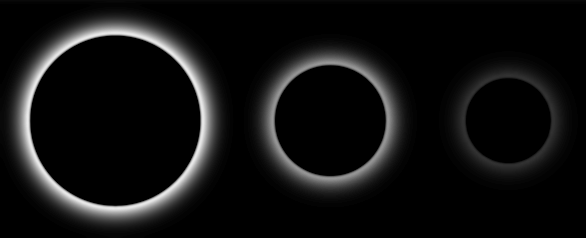


Case1
Image Name: Balls.tif
At sigma1 = 1.6 and sigma2 = 12.8


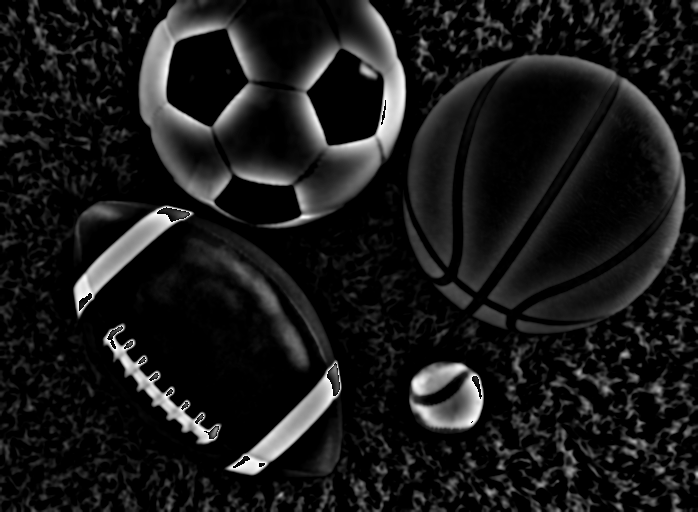


Case1
Image Name: Drop.tif
At sigma1 = 1.6 and sigma2 = 12.8


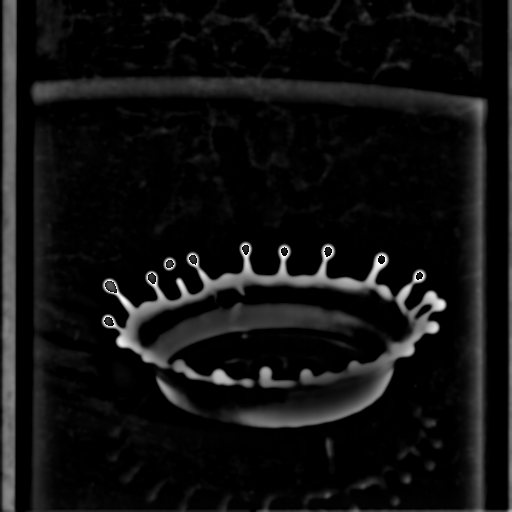


Case2: sigma1 nearly equal to sigma2 , sigma1 is large , about many pixel width
Let us take sigma1 = 15 and sigma2 = 17

Case2
Image Name: Blobs.tif
At sigma1 = 15 and sigma2 = 17


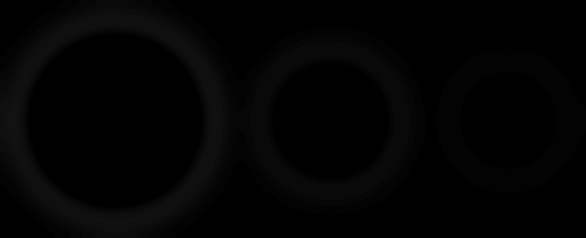


Case2
Image Name: Balls.tif
At sigma1 = 15 and sigma2 = 17


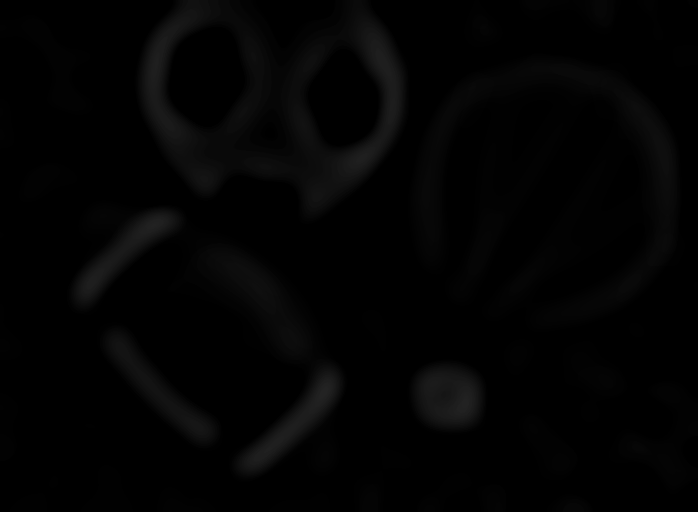


Case2
Image Name: Drop.tif
At sigma1 = 15 and sigma2 = 17


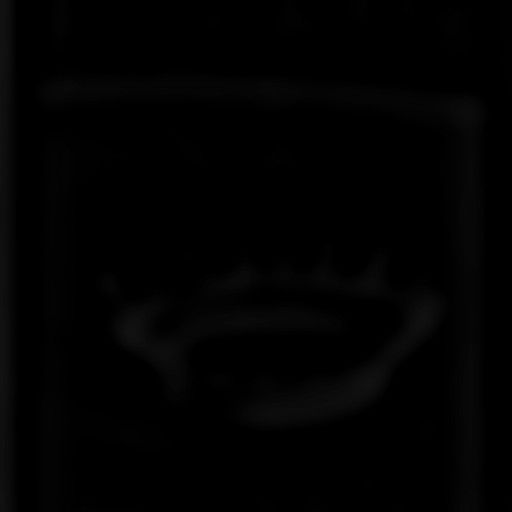


Case3: sigma1 nearly equal to sigma2 , sigma1 is small , about a few pixel width
Let us take sigma1 = 1.6 and sigma2 = 2.26

Case3
Image Name: Blobs.tif
At sigma1 = 1.6 and sigma2 = 2.26


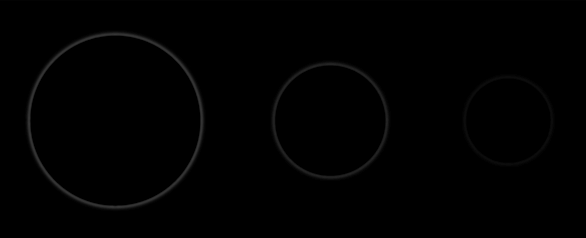


Case3
Image Name: Balls.tif
At sigma1 = 1.6 and sigma2 = 2.26


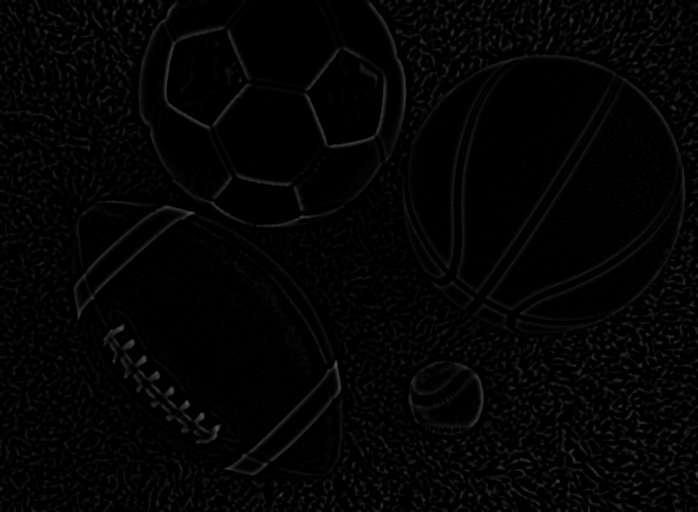


Case3
Image Name: Drop.tif
At sigma1 = 1.6 and sigma2 = 2.26


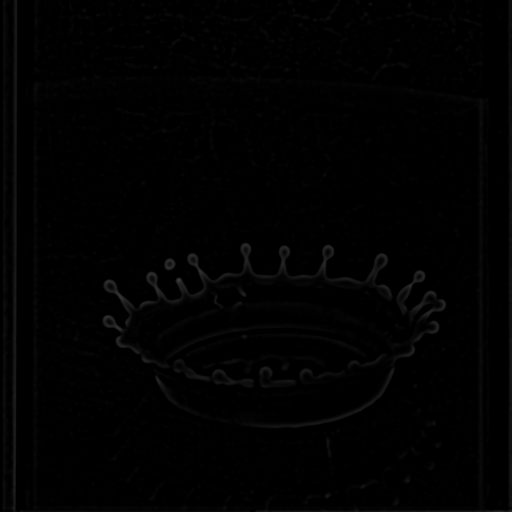

In [6]:
# A function that returns Gaussian kernel of certain dimension
def Gaussian(sigma,mux,muy):
  #size of the kernel as specified in the problem
  kernel_size = m.ceil(6*sigma2)
  if kernel_size%2 == 0:
    kernel_size = kernel_size + 1
  Gaussian_Kernel = np.zeros((kernel_size,kernel_size),dtype='float32')
  p = kernel_size//2
  q = kernel_size//2

  for x in range(-p,p+1):
    for y in range(-q,q+1):
      gaussian = (1/(2*np.pi*sigma**2))*np.exp(-(((x-mux)**2)+(y-muy)**2)/(2*sigma**2))

      Gaussian_Kernel[x+p,y+q] = gaussian

  Gaussian_Kernel = Gaussian_Kernel/np.sum(Gaussian_Kernel)

  return Gaussian_Kernel


# main code
if __name__ == "__main__":
  images = os.listdir("My Drive/assignment 3 images")   #list of images
  for i in range(3):
    if i == 0:
      print(f"\nCase{i+1}: sigma1 << sigma2 , sigma1 is small , about a few pixel width")
      sigma1 = 1.6                               #Try different values of sigma1
      sigma2 = 12.8                                #Try different values of sigma2
      print("Let us take sigma1 =",sigma1,"and sigma2 =",sigma2)
    elif i == 1:
      print(f"\nCase{i+1}: sigma1 nearly equal to sigma2 , sigma1 is large , about many pixel width")
      sigma1 = 15                                 #Try different values of sigma1
      sigma2 = 17                            #Try different values of sigma2
      print("Let us take sigma1 =",sigma1,"and sigma2 =",sigma2)
    else:
      print(f"\nCase{i+1}: sigma1 nearly equal to sigma2 , sigma1 is small , about a few pixel width")
      sigma1 = 1.6                               #Try different values of sigma1
      sigma2 = 2.26                                 #Try different values of sigma2
      print("Let us take sigma1 =",sigma1,"and sigma2 =",sigma2)
    for image_num in range(len(images)):
      path = "My Drive/assignment 3 images/" + images[image_num]
      #load the image in BGR format
      image = cv.imread(path)
      #Take out the different channels of image
      B = image[:,:,0]
      G = image[:,:,1]
      R = image[:,:,2]
      #Gaussian kernels at sigma1 and sigma2
      kernel1 = Gaussian(sigma1,0,0)
      kernel2 = Gaussian(sigma2,0,0)
      #Difference of above gaussian kernels gives us DoG kernel
      kernel = kernel1 - kernel2
      #Apply the DoG kernel on all the three channels
      B = cv.filter2D(B, -1, kernel)
      G = cv.filter2D(G, -1, kernel)
      R = cv.filter2D(R, -1, kernel)
      #Take the sum of absolute values of B,G and R
      image= abs(B)+abs(G)+abs(R)
      #Output in each case
      print(f"\nCase{i+1}")
      print("Image Name:",images[image_num],end="\n")
      print("At sigma1 =",sigma1,"and sigma2 =",sigma2)
      cv2_imshow(image)